# Mucking around with exponential curves...

We'll take a look at using a negative  our spore dispersal using an [natural] exponential curve, which [Galante et al.](http://www.tandfonline.com/doi/full/10.3852/10-388) found useful for describing spore concentrations from a mushroom. 

In [1]:
from sympy import symbols
from sympy.plotting import plot
from sympy import exp, ln

In [2]:
x  = symbols('x')

In [35]:
s = plot(exp(-0.5*x), line_color='Purple', ylim=(0,1), xlim=(0,15))
t = plot(exp(-1.0*x), line_color='Green', ylim=(0,1), xlim=(0,15))
u = plot(exp(-2*x), line_color='Blue', ylim=(0,1), xlim=(0,15))
v = plot(exp(-4*x), line_color='Red', ylim=(0,1), xlim=(0,15))

s.extend(t);s.extend(u);s.extend(v)
s.legend = True

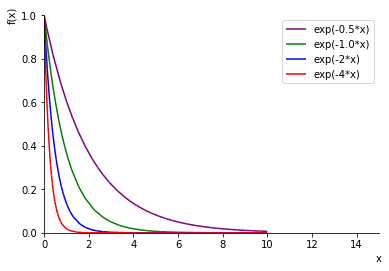

In [36]:
s.show()

Some very simple things to notice here. One convenient fact is that all exponential curves with a negative coefficient go to the asymptote of zero when distance is great, and to 1 when distance is very small, because any real number taken to the 0-th power is 1. The negative exponential functions approximate what we see in nature very well, high probability-of-infection/high spore numbers close to a source, with a long tail of few, but well-dispersed spores at longer distances. 

If we write this function with a dispersal ('D') coefficient, it looks like this: 

\begin{equation*}
f(x)   =  e^{-Dx}
\end{equation*}

When a fungus is well-dispersed (many small spores well ejected from a sporocarp), we give it a small value, and when the opposite is true, we'll give in a high value. In the above diagram, the purple fungus is well-dispersed, it has a small D value, D=0.5. The red fungus is poorly dispersed, D=4. 

Given this, it may be more convenient to use the additive inverse of D as a parameter on the model, so that we are working with positive numbers. And the multiplicative inverse (the reciprocal), so that magnitudes of our dispersal coefficient will correlate with number-of-spores/probability-of-infection. In this way, for instance, at a distance of one, dispersal coefficient of five gives a much greater probability of infection  than 2:

\begin{equation*}
f(5)   =  e^{-(1/5)}    = 0.82
\end{equation*}

\begin{equation*}
f(5)   =  e^{-(1/2)}    = 0.61
\end{equation*}

Let's recode our plot above to reflect this:

In [ ]:
D = lambda d: -(1/d) ## d is our new dispersal coefficient

s = plot(exp(D(1)*x), line_color='Purple', ylim=(0,1), xlim=(0,15))
t = plot(exp(D(2)*x), line_color='Green', ylim=(0,1), xlim=(0,15))
u = plot(exp(D(3)*x), line_color='Blue', ylim=(0,1), xlim=(0,15))
v = plot(exp(D(4)*x), line_color='Red', ylim=(0,1), xlim=(0,15))

s.extend(t);s.extend(u);s.extend(v)
s.legend = True

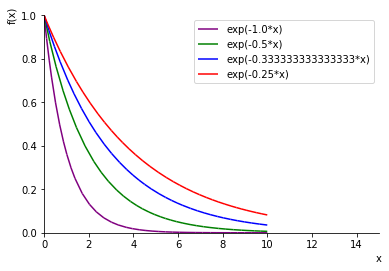

In [32]:
s.show()

Not sure how to ask sympy plotter to make a better legend. But we have d=1 as our poorest disperser (purple), and d = 4 as our best disperser (red). So this is the coefficient we'll keep as a parameter in our model. 